In [1]:
#指导教师：宋陆军教师
#参考资料：基于python的金融分析与风险管理-斯文
#          风险管理与金融机构赫尔

In [2]:
import numpy as  np #导入numpy模块
import pandas as pd #导入pandas模块
import matplotlib.pyplot as plt #导入pyplot模块
from pylab import mpl #导入mpl模块
# mpl.rcParams["font.sans-serif"] = ["simehei"]
# mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False

In [3]:
S = np.linspace(30,70,100)
K = 50
C = 6
call1 = 100*np.maximum(S-K,0)
call2 = 100*np.maximum(S-K-C,-C)

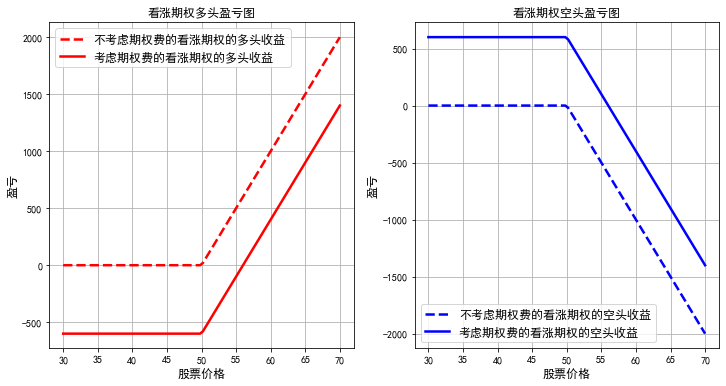

In [4]:
plt.figure(figsize=(12,6))
p1=plt.subplot(1,2,1)   
p1.plot(S,call1,"r--",label = u'不考虑期权费的看涨期权的多头收益',lw=2.5)
p1.plot(S,call2,"r-",label = u'考虑期权费的看涨期权的多头收益',lw=2.5)
p1.set_xlabel(u"股票价格",fontsize = 12)
p1.set_ylabel(u'盈亏',fontsize =12)
p1.set_title(u'看涨期权多头盈亏图',fontsize =12,rotation =0)
p1.legend(fontsize =12)
p1.grid("True")
p2 =  plt.subplot(1,2,2)     
p2.plot(S,-call1,"b--",label = u'不考虑期权费的看涨期权的空头收益',lw=2.5)
p2.plot(S,-call2,"b-",label = u'考虑期权费的看涨期权的空头收益',lw=2.5)
p2.set_xlabel(u"股票价格",fontsize = 12)
p2.set_ylabel(u'盈亏',fontsize =12)
p2.set_title(u'看涨期权空头盈亏图',fontsize =12,rotation =0)
p2.legend(fontsize =12)
p2.grid("True")     

In [5]:
def call_BS(S,K,sigma,r,T):
    """运用BSM定价模型计算欧式看涨期权价格
    S:代表期权的价格
    K：代表期权的执行价格
    sigma：代表标的资产的年化波动率
    r；代表无风险收益率
    T:代表期权合约的剩余期限"""
    import numpy as  np
    from scipy.stats import norm
    d1 =(np.log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)

In [6]:
def put_BS(S,K,sigma,r,T):
    """运用BSM定价模型计算欧式看跌期权价格
    S:代表期权的价格
    K：代表期权的执行价格
    sigma：代表标的资产的年化波动率
    r；代表无风险收益率
    T:代表期权合约的剩余期限"""
    
    import numpy as  np
    from scipy.stats import norm
    d1 =(np.log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)

In [7]:
call = call_BS(S=5.29,K=6,sigma=0.24,r=0.04,T=0.5)
put = put_BS(S=5.29,K=6,sigma=0.24,r=0.04,T=0.5)
print("根据BSM模型计算的看涨期权价格",round(call,4))
print("根据BSM模型计算的看跌期权价格",round(put,4))

根据BSM模型计算的看涨期权价格 0.1532
根据BSM模型计算的看跌期权价格 0.7443


In [8]:
S_list = np.linspace(5.0,7.0,100)
call_list1 = call_BS(S=S_list,K=6,sigma=0.24,r=0.04,T=0.5)
put_list1 = put_BS(S=S_list,K=6,sigma=0.24,r=0.04,T=0.5)

In [9]:
call_list1

array([0.08305197, 0.08699075, 0.09106293, 0.09527063, 0.09961593,
       0.10410083, 0.10872729, 0.11349722, 0.11841245, 0.12347476,
       0.12868586, 0.13404741, 0.13956097, 0.14522806, 0.15105011,
       0.1570285 , 0.16316451, 0.16945937, 0.17591423, 0.18253014,
       0.1893081 , 0.19624903, 0.20335376, 0.21062306, 0.2180576 ,
       0.22565798, 0.23342474, 0.24135831, 0.24945907, 0.2577273 ,
       0.26616323, 0.27476698, 0.28353862, 0.29247813, 0.30158543,
       0.31086036, 0.32030267, 0.32991207, 0.33968817, 0.34963053,
       0.35973865, 0.37001193, 0.38044974, 0.39105136, 0.40181603,
       0.41274292, 0.42383114, 0.43507974, 0.44648772, 0.45805402,
       0.46977755, 0.48165713, 0.49369157, 0.50587961, 0.51821996,
       0.53071128, 0.54335218, 0.55614126, 0.56907704, 0.58215804,
       0.59538274, 0.60874958, 0.62225697, 0.63590329, 0.64968691,
       0.66360617, 0.67765937, 0.6918448 , 0.70616075, 0.72060547,
       0.73517719, 0.74987415, 0.76469456, 0.77963662, 0.79469

In [10]:
put_list1

array([0.96424401, 0.94798077, 0.93185093, 0.91585661, 0.89999989,
       0.88428277, 0.86870721, 0.85327512, 0.83798833, 0.82284862,
       0.8078577 , 0.79301722, 0.77832877, 0.76379383, 0.74941387,
       0.73519023, 0.72112423, 0.70721707, 0.6934699 , 0.67988379,
       0.66645974, 0.65319865, 0.64010136, 0.62716863, 0.61440115,
       0.60179952, 0.58936425, 0.5770958 , 0.56499454, 0.55306076,
       0.54129466, 0.52969639, 0.51826601, 0.50700351, 0.49590879,
       0.48498169, 0.47422198, 0.46362936, 0.45320344, 0.44294378,
       0.43284988, 0.42292114, 0.41315693, 0.40355653, 0.39411918,
       0.38484405, 0.37573025, 0.36677683, 0.35798279, 0.34934707,
       0.34086858, 0.33254614, 0.32437856, 0.31636458, 0.30850291,
       0.30079221, 0.29323109, 0.28581814, 0.27855191, 0.27143089,
       0.26445357, 0.25761839, 0.25092375, 0.24436806, 0.23794966,
       0.23166689, 0.22551807, 0.21950149, 0.21361542, 0.20785811,
       0.20222782, 0.19672276, 0.19134115, 0.18608119, 0.18094

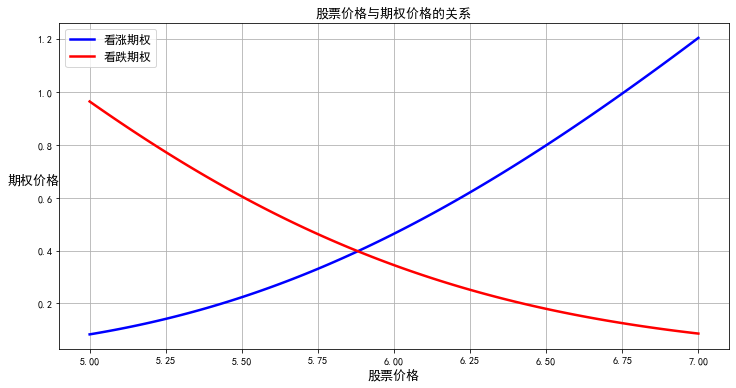

In [11]:
plt.figure(figsize=(12,6))   
plt.plot(S_list,call_list1,"b-",label = u'看涨期权',lw=2.5)
plt.plot(S_list,put_list1,"r-",label = u'看跌期权',lw=2.5)
plt.xlabel(u"股票价格",fontsize = 13)
plt.ylabel(u"期权价格",fontsize =13,rotation = 0)
plt.title(u'股票价格与期权价格的关系',fontsize =13)
plt.legend(fontsize =12)
plt.grid("True")    
plt.show()

In [12]:
K_list = np.linspace(5.0,7.0,100)
call_list2 = call_BS(S=5.29,K=K_list,sigma=0.24,r=0.04,T=0.5)
put_list2 = put_BS(S=5.29,K=K_list,sigma=0.24,r=0.04,T=0.5)

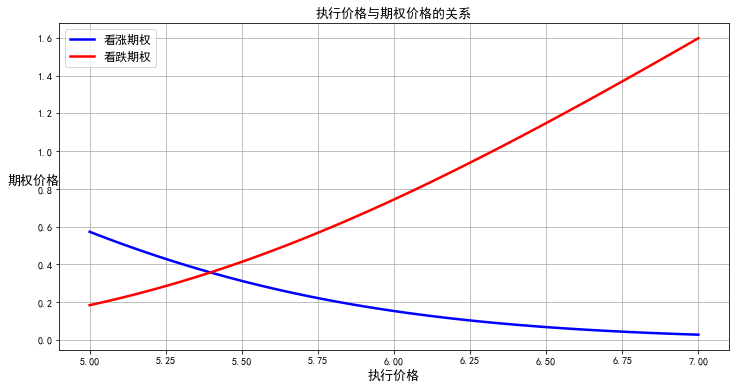

In [13]:
plt.figure(figsize=(12,6))   
plt.plot(K_list,call_list2,"b-",label = u'看涨期权',lw=2.5)
plt.plot(K_list,put_list2,"r-",label = u'看跌期权',lw=2.5)
plt.xlabel(u"执行价格",fontsize = 13)
plt.ylabel(u"期权价格",fontsize =13,rotation = 0)
plt.title(u'执行价格与期权价格的关系',fontsize =13)
plt.legend(fontsize =12)
plt.grid("True")    
plt.show()

In [14]:
sigma_list = np.linspace(0.05,0.35,100)
call_list3 = call_BS(S=5.29,K=6,sigma=sigma_list,r=0.04,T=0.5)
put_list3 = put_BS(S=5.29,K=6,sigma=sigma_list,r=0.04,T=0.5)

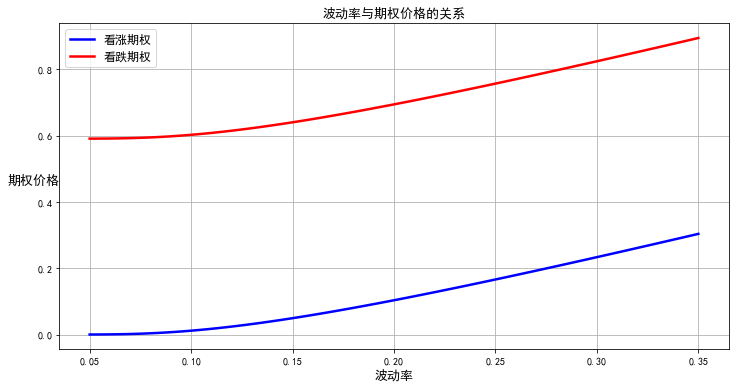

In [15]:
plt.figure(figsize=(12,6))   
plt.plot(sigma_list,call_list3,"b-",label = u'看涨期权',lw=2.5)
plt.plot(sigma_list,put_list3,"r-",label = u'看跌期权',lw=2.5)
plt.xlabel(u"波动率",fontsize = 13)
plt.ylabel(u"期权价格",fontsize =13,rotation = 0)
plt.title(u'波动率与期权价格的关系',fontsize =13)
plt.legend(fontsize =12)
plt.grid("True")    
plt.show()

In [16]:
r_list = np.linspace(0.01,0.1,100)
call_list4 = call_BS(S=5.29,K=6,sigma=0.24,r=r_list,T=0.5)
put_list4 = put_BS(S=5.29,K=6,sigma=0.24,r=r_list,T=0.5)

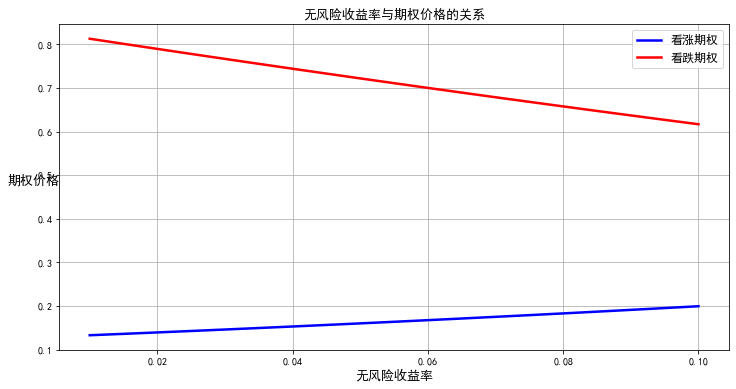

In [17]:
plt.figure(figsize=(12,6))   
plt.plot(r_list,call_list4,"b-",label = u'看涨期权',lw=2.5)
plt.plot(r_list,put_list4,"r-",label = u'看跌期权',lw=2.5)
plt.xlabel(u"无风险收益率",fontsize = 13)
plt.ylabel(u"期权价格",fontsize =13,rotation = 0)
plt.title(u'无风险收益率与期权价格的关系',fontsize =13)
plt.legend(fontsize =12)
plt.grid("True")    
plt.show()

In [18]:
T_list = np.linspace(0.01,3,100)
call_list5 = call_BS(S=5.29,K=6,sigma=0.24,r=0.04,T=T_list)
put_list5 = put_BS(S=5.29,K=6,sigma=0.24,r=0.04,T=T_list)

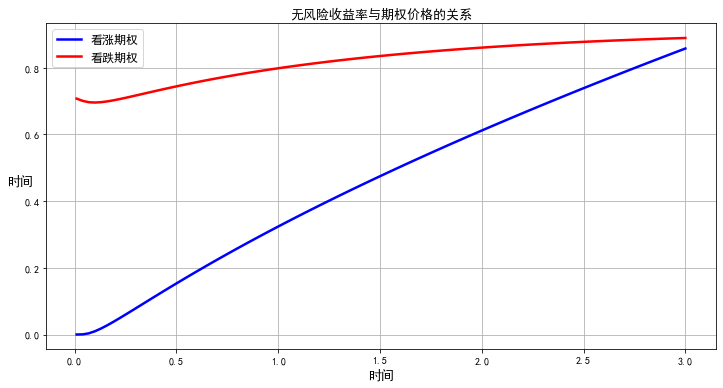

In [19]:
plt.figure(figsize=(12,6))   
plt.plot(T_list,call_list5,"b-",label = u'看涨期权',lw=2.5)
plt.plot(T_list,put_list5,"r-",label = u'看跌期权',lw=2.5)
plt.xlabel(u"时间",fontsize = 13)
plt.ylabel(u"时间",fontsize =13,rotation = 0)
plt.title(u'无风险收益率与期权价格的关系',fontsize =13)
plt.legend(fontsize =12)
plt.grid("True")    
plt.show()